# 导入openvc模块

In [2]:
import cv2 as cv
# 显示cv的版本
cv.__version__

'4.6.0'

# 读取图片
1.导入图片
2，显示图片

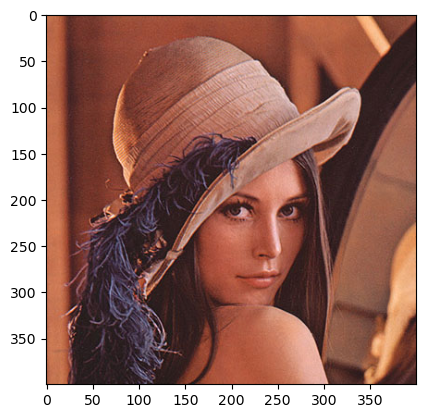

In [3]:
# 1.导入图片
img = cv.imread("img/lena.jpg")
# 显示图片
# 方法一
# cv.imshow("img",img)
# cv.waitKey(0)# 让程序处于等待推出状态
# cv.destroyAllWindows()# 当程序推出的时候，释放所有窗口资源

# 方法二 直接显示在当前页面
# OPENVC图片是BGR格式，但是matplotlib是RGB格式
import matplotlib.pyplot as plt 
# plt.imshow(img)
# 图片转换 因为格式不一样，所以使用COLOR_BGR2RGB进行格式转换
dst = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(dst)

# 写出图片
使用imwrite()将图片保存到磁盘中

In [4]:
cv.imwrite("./lena_copy.jpg",img)

True

# 创建图像
- 图像是二维矩阵，由宽度和高度组成
- 二维矩阵中存放的是RGB颜色信息

In [5]:
import numpy as np
# 创建矩阵
dst = np.zeros((2,3,3),np.uint8)
dst

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

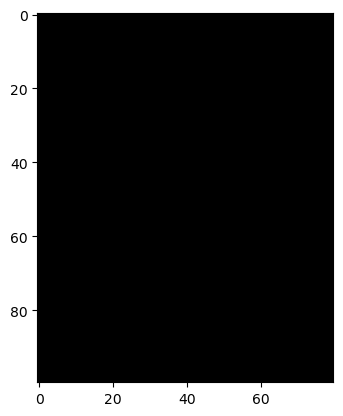

In [6]:
# 创建一个宽度80， 高度100的图像
dst = np.zeros((100,80,3),np.uint8)
plt.imshow(dst)

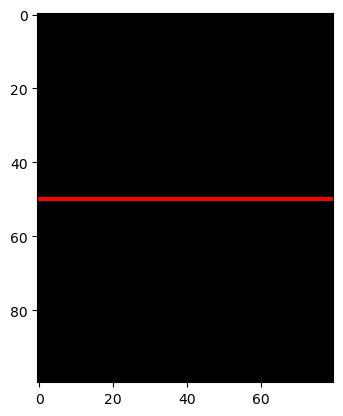

In [7]:
# 在图像中间显示一根红色的线
for col in range(80):
    dst[50,col] = (250,0,0)
plt.imshow(dst)

# 图像剪切
图像本身是矩阵，操作图像其实就是在操作矩阵
1.读取图片
2.操作图片
3.显示图片

(400, 400, 3)
400 400


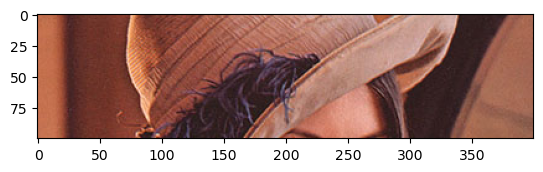

In [8]:
import cv2 as cv
# 1导入图片
img = cv.imread("img/lena.jpg")
# 2操作图片
# 获取图片的宽高信息
print(img.shape)
height,width = img.shape[0:2]# 采用切片的方式获取宽高
print(width,height)
# 截取图片
dst = img[100:200,0:400]
# 3显示图片
# 颜色转换
dst = cv.cvtColor(dst,cv.COLOR_BGR2RGB)
plt.imshow(dst)

# 图像镜像
1. 读取图片
2. 获取图片的宽高
3. 创建一个两倍原图高度的画布
4. 将原图中的信息填充到画布中
    - 正向填充
    - 反向填充

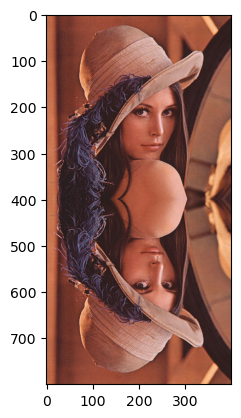

In [9]:
import numpy as np
import cv2 as cv
# 1读取图片
img = cv.imread("img/lena.jpg")
# 2获取图片的宽高
height,width = img.shape[0:2]
# 3创建一个两倍原图高度的画布
dst = np.zeros((height*2,width,3),np.uint8)
# 4将原图中的信息填充到画布中
# 获取原图
for row in range(height):
    for col in range(width):
        # 从原图中获取原图中每一个元素点
        color = img[row,col]
        # 正向填充
        dst[row,col] = color
        # 反向填充
        dst[height * 2 - 1 - row,col] = color

# 显示图像
dst = cv.cvtColor(dst,cv.COLOR_BGR2RGB)
plt.imshow(dst)

# 图像的缩放处理
cv.resize

In [10]:
# 封装显示函数
def imshow(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)

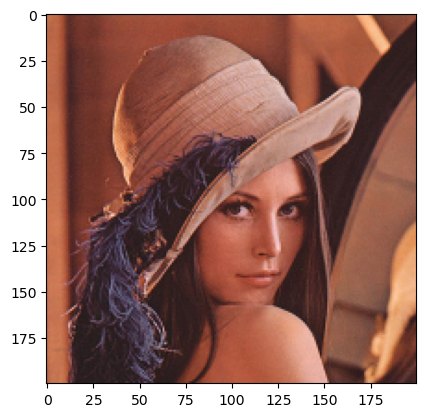

In [11]:
# 导入图片
img = cv.imread("img/lena.jpg")
dst = cv.resize(img,(200,200))
# 调用图片显示方法
imshow(dst)

# 图片的位移

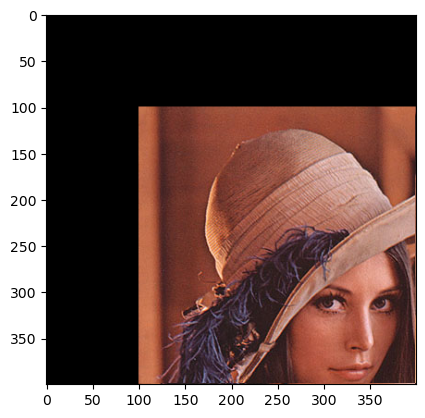

In [14]:
import cv2 as cv
img = cv.imread("img/lena.jpg")
# 拿到原图的高宽
height,width = img.shape[0:2]
# 创建画布
dst = np.zeros((height,width,3),np.uint8)

# 移动的距离
dx = 100 
dy = 100
# 向画布中填充信息
for row in range(height):
    for col in range(width):
        # 从原图中取到颜色信息
        color = img[row,col]
        dst_row = row + dy
        dst_col = col + dx
        if dst_row >= height:
            dst_row = height - 1
        if dst_col >= width:
            dst_col = width - 1

        # 填充颜色
        dst[dst_row,dst_col] = color
# 显示图像
imshow(dst)

    

## 图片位移（调用API）
cv.warpAffine

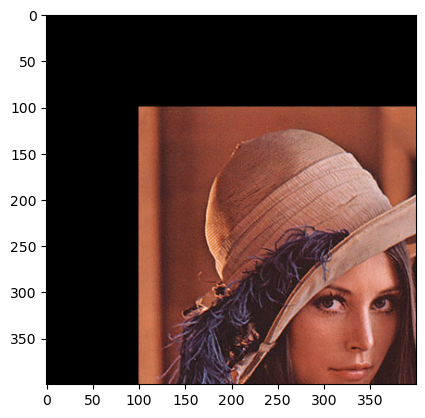

In [19]:
import cv2 as cv
import numpy as np
img = cv.imread("img/lena.jpg")
M = np.float32([[1,0,dx],
             [0,1,dy]])
dst = cv.warpAffine(img,M,(400,400))
imshow(dst)

## 图片旋转

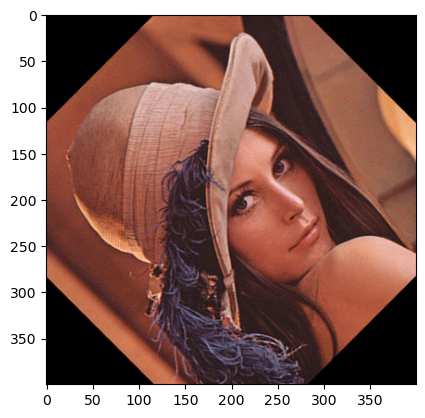

In [20]:
M = cv.getRotationMatrix2D((200,200),45,1)
dst = cv.warpAffine(img,M,(400,400))
imshow(dst)

## 图像仿射变换

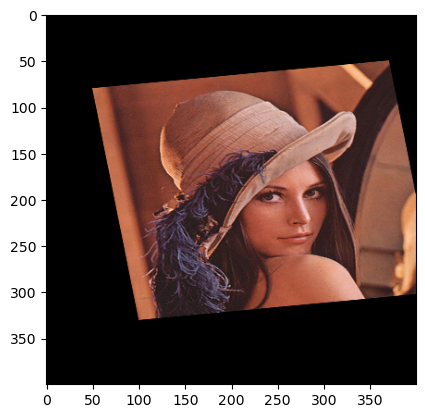

In [21]:
# 参考点
source = np.float32([[0,0],[width - 1,0],[0,height - 1]])
# 将参考点转换到目标点
target = np.float32([[50,80],[width - 30,50],[100,height - 70]])
# 转换关系
M = cv.getAffineTransform(source,target)
dst = cv.warpAffine(img,M,(400,400))
imshow(dst)